In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.utils import load_data, remove_zero_features, load_confounders, standardize
from utils.utils import load_measurement_labels, load_roi_labels
from utils.utils import compute_univariate_scores, compute_univariate_scores_global, compute_univariate_auroc_scores

from sklearn.model_selection import train_test_split

In [2]:
plot_path = 'plots/'

In [3]:
# Load data for classification task
subject_data, features, diagnoses = load_data('classification')

In [4]:
C = load_confounders(subject_data)
F = remove_zero_features(features.iloc[:,1:], False)
D = diagnoses.iloc[:,1:]

In [5]:
C_standardized = standardize(C)
F_standardized = standardize(F)

In [6]:
# Load labels for rois and measures
aseg_roi_labels, aparc_roi_labels = load_roi_labels(F)
global_msnts, aseg_msnts, aparc_msnts = load_measurement_labels()

In [7]:
# For boostrapping
boot_iter = 100

## 1. Quantify associations between features and confounders with $R^2$

In [8]:
# Split dataset into train and test (holdout) set
F_train, F_test, C_train, C_test = train_test_split(F_standardized, C_standardized, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(C_train)}")
print(f"Number of samples in test set: {len(C_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 1.1. Global features

In [9]:
score_dicts = compute_univariate_scores_global(F_train, F_test, C_train, C_test, global_msnts, 'r2', boot_iter)

In [10]:
P = pd.DataFrame.from_dict(score_dicts, orient='index', columns=global_msnts)

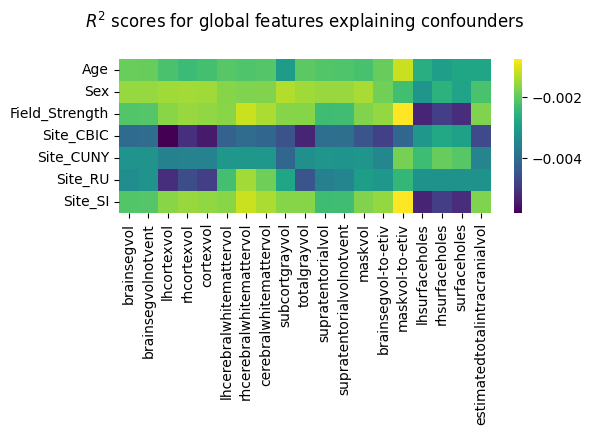

In [11]:
# Plot
plt.figure(1,(6,2))
sns.heatmap(P, cmap='viridis', fmt=".2f", vmin=P.min(axis=None), vmax=P.max(axis=None))
plt.title(r"$R^2$ scores for global features explaining confounders" + "\n")
plt.savefig(plot_path + 'r2_features_confounder_global.png', bbox_inches='tight')

### 1.2. Subcortical features

In [12]:
score_dicts = compute_univariate_scores(F_train, F_test, C_train, C_test, 'aseg', aseg_msnts, 'r2', boot_iter)

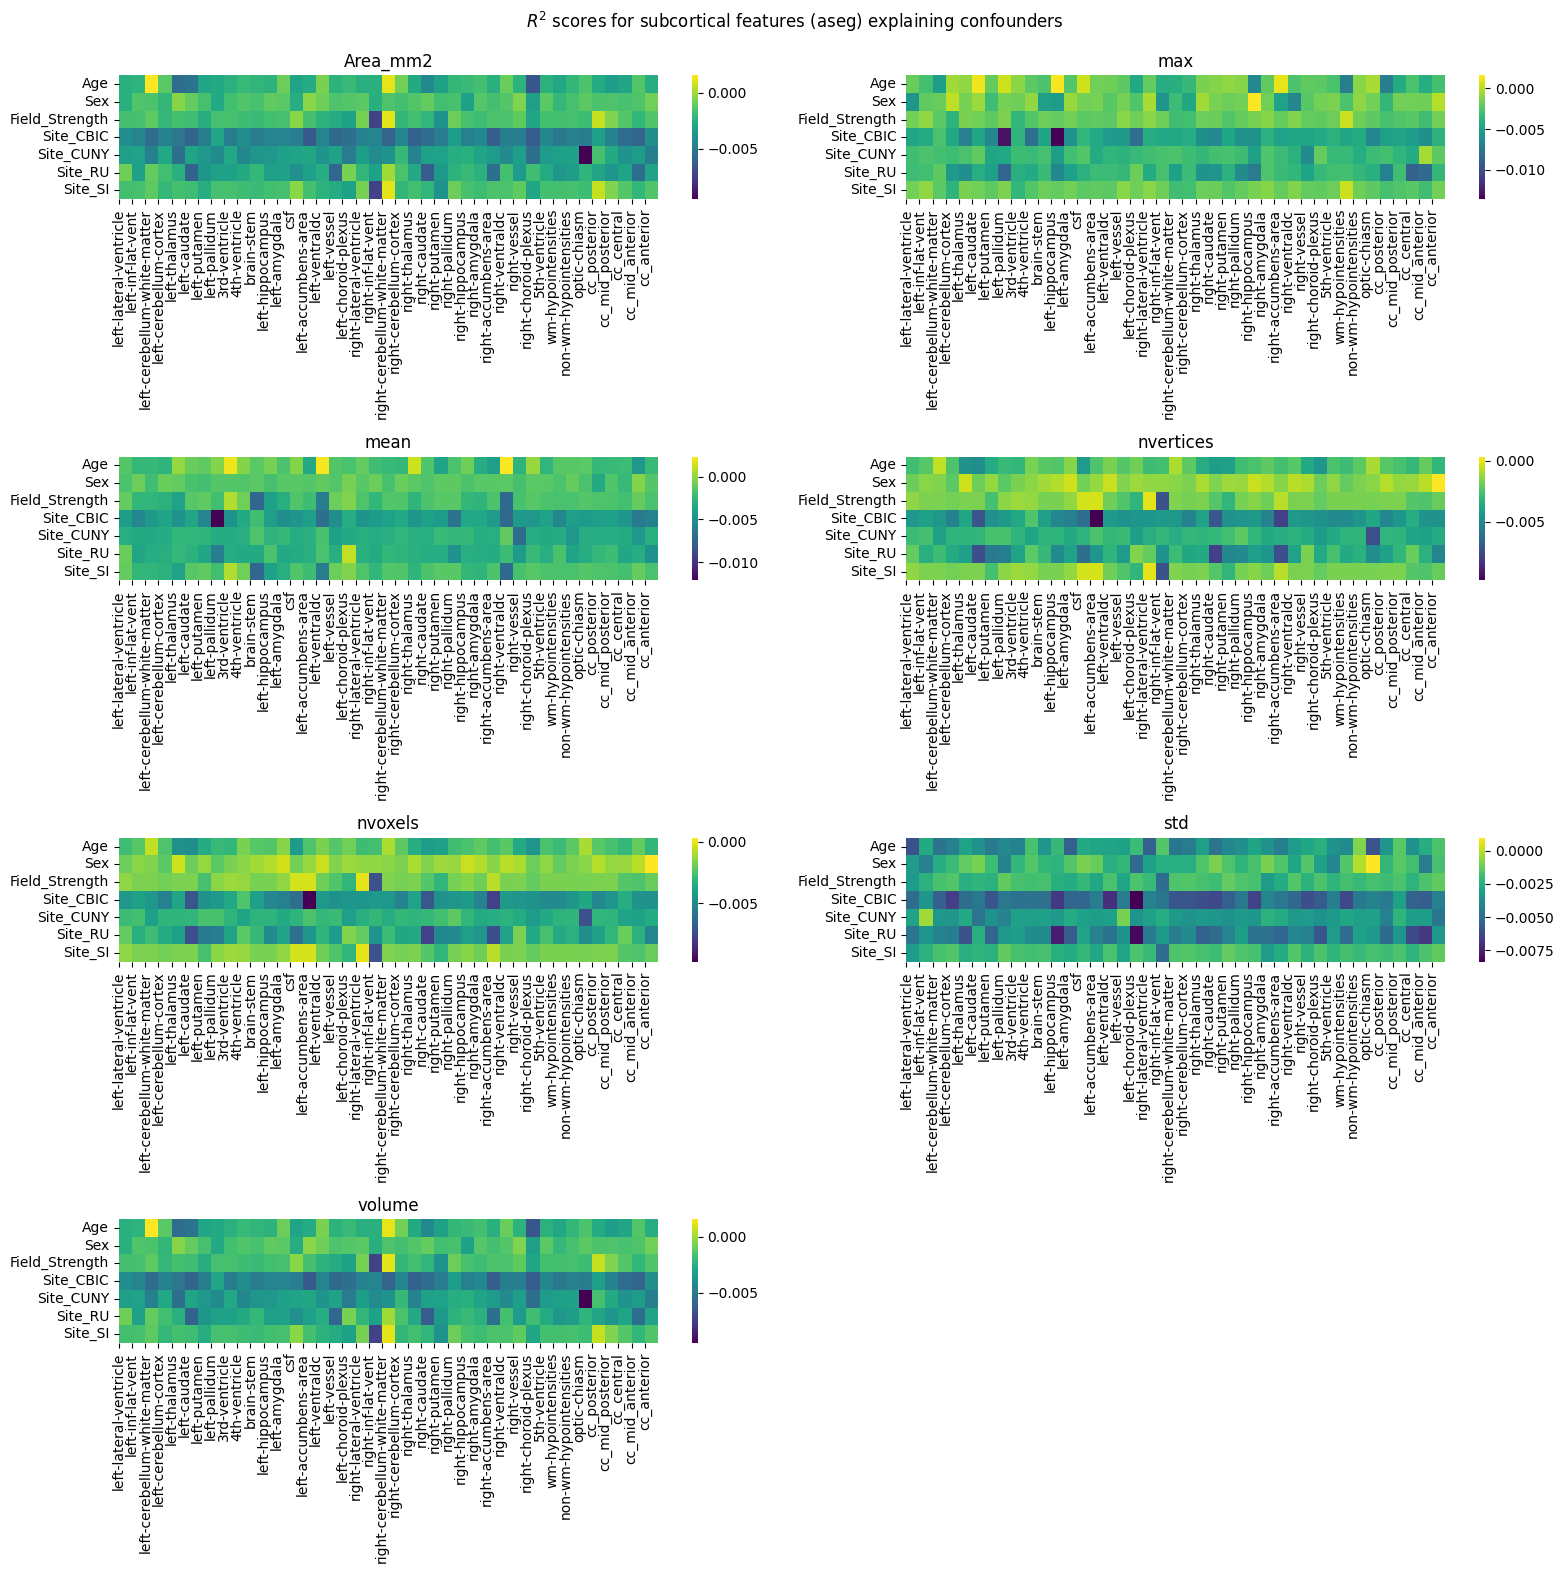

In [13]:
# Plot
plt.figure(1,(16,16))

for index in range(len(aseg_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aseg_roi_labels)
    plt.subplot(4,2,index+1)
    #sns.heatmap(P, cmap='viridis',fmt=".2f")
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None), fmt=".2f")
    plt.xticks(range(len(aseg_roi_labels)),aseg_roi_labels)
    plt.title(f"{aseg_msnts[index]}")

plt.suptitle(r"$R^2$ scores for subcortical features (aseg) explaining confounders" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}r2_features_confounder_aseg.png', bbox_inches='tight')

### 1.3. Cortical features

#### 1.3.1 Left hemisphere

In [14]:
score_dicts = compute_univariate_scores(F_train, F_test, C_train, C_test, 'aparc_lh', aparc_msnts, 'r2', boot_iter)

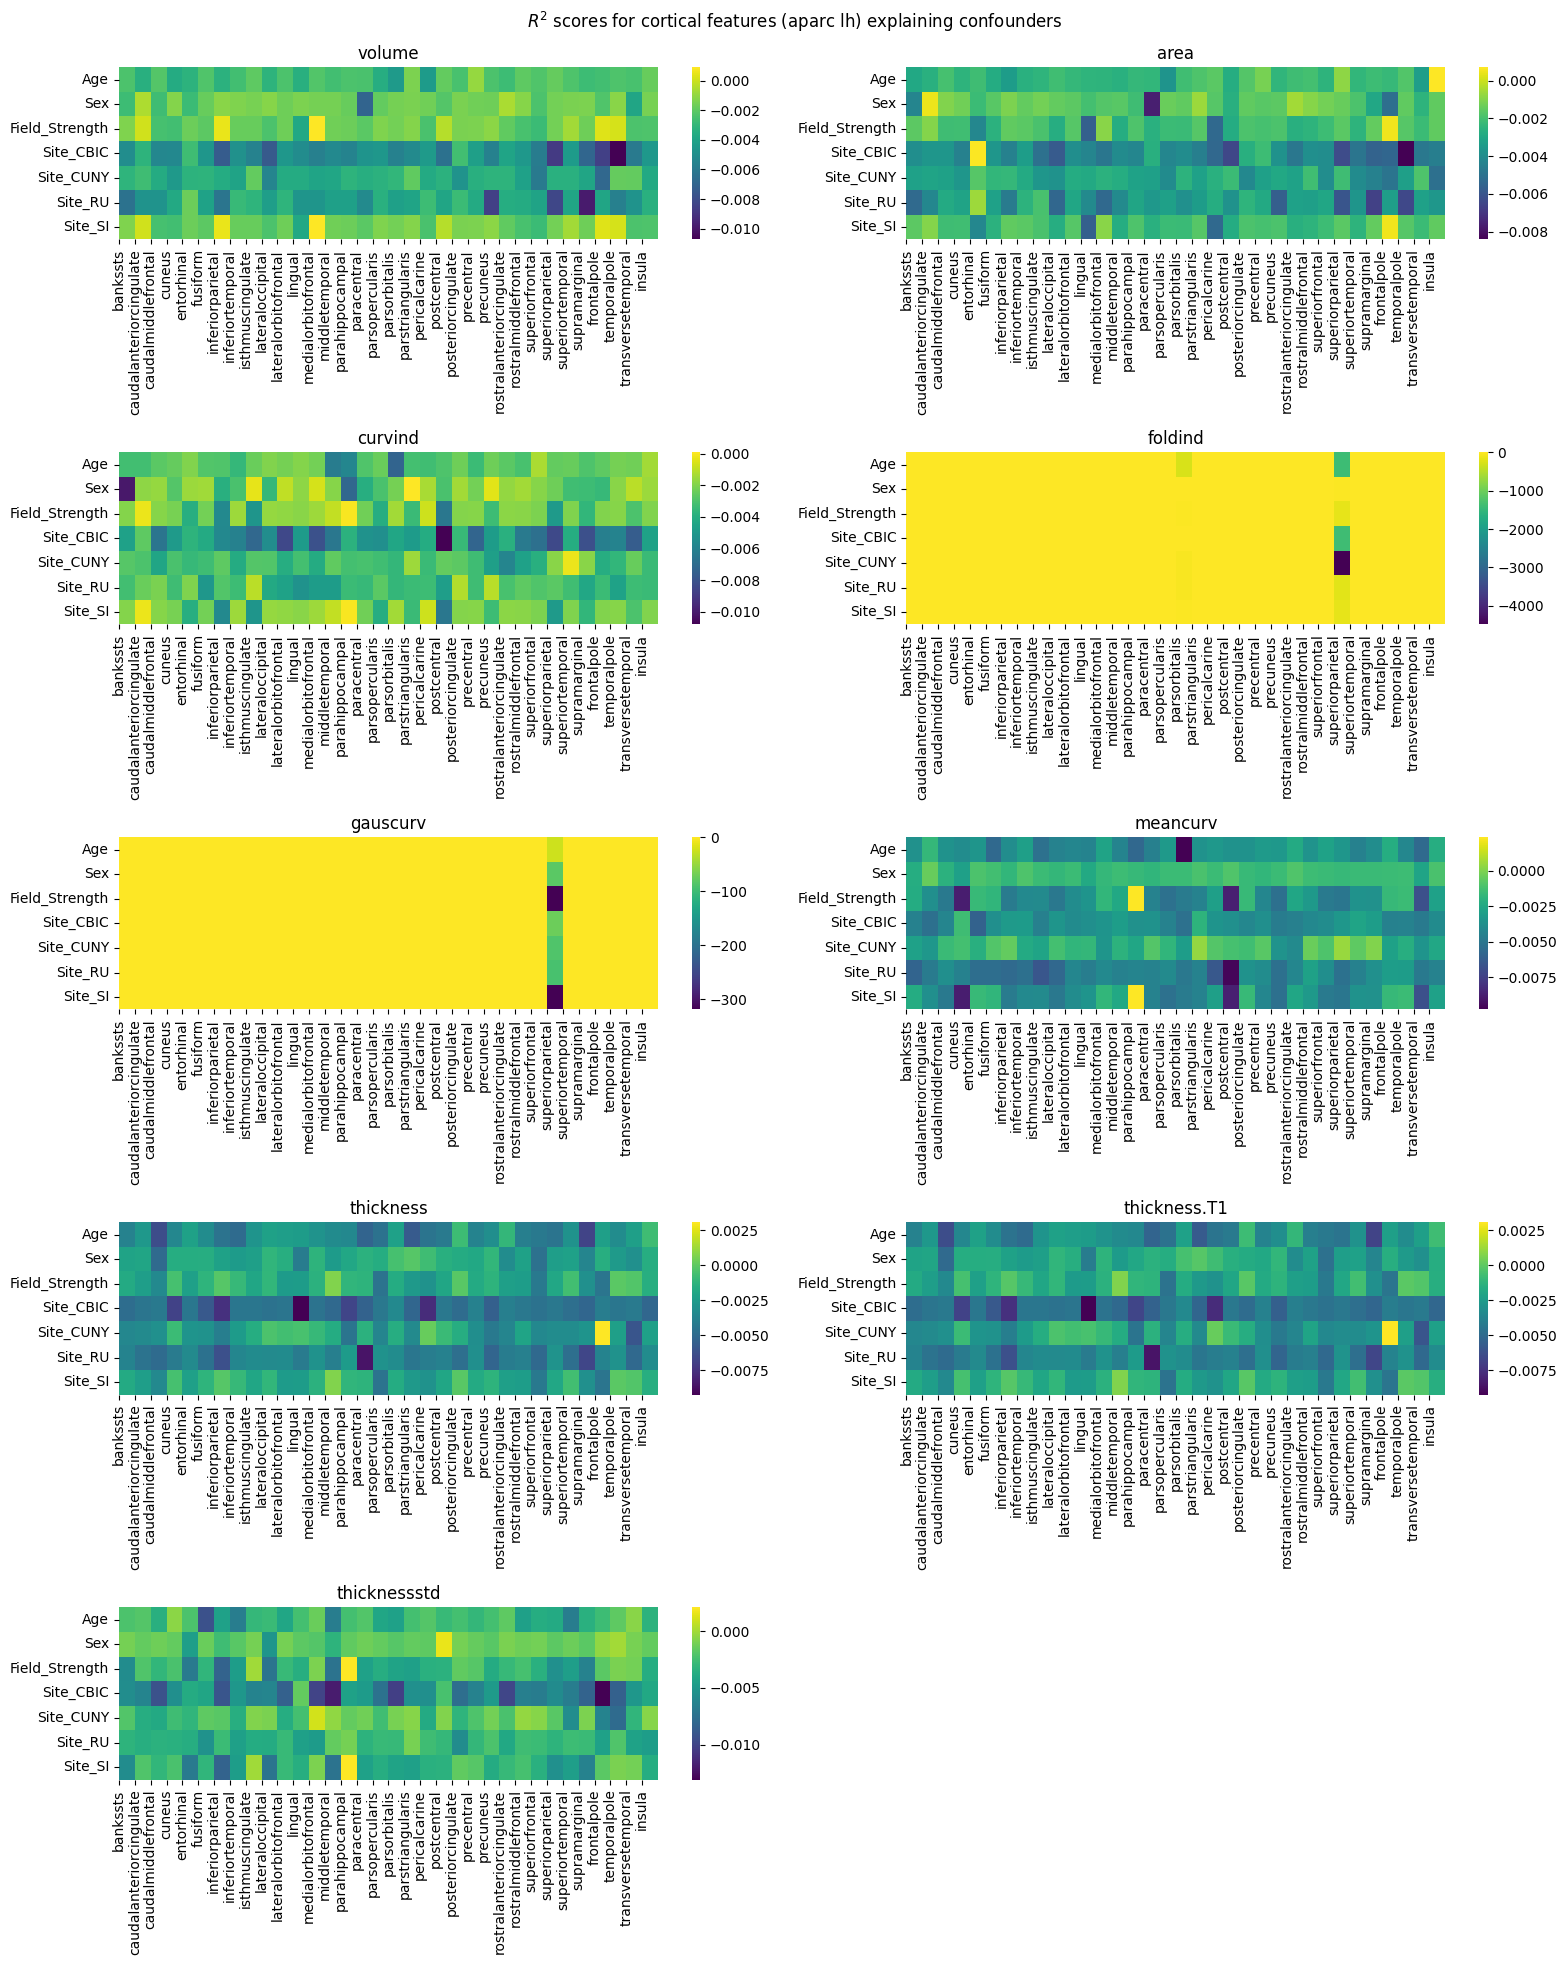

In [15]:
# Plot
plt.figure(1,(16,20))

for index in range(len(aparc_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aparc_roi_labels)
    plt.subplot(5,2,index+1)
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None))
    plt.xticks(range(len(aparc_roi_labels)),aparc_roi_labels)
    plt.title(f"{aparc_msnts[index]}")

plt.suptitle(r"$R^2$ scores for cortical features (aparc lh) explaining confounders" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}r2_features_confounder_aparc_lh.png', bbox_inches='tight')

#### 1.3.2 Right hemisphere

In [16]:
score_dicts = compute_univariate_scores(F_train, F_test, C_train, C_test, 'aparc_rh', aparc_msnts, 'r2', boot_iter)

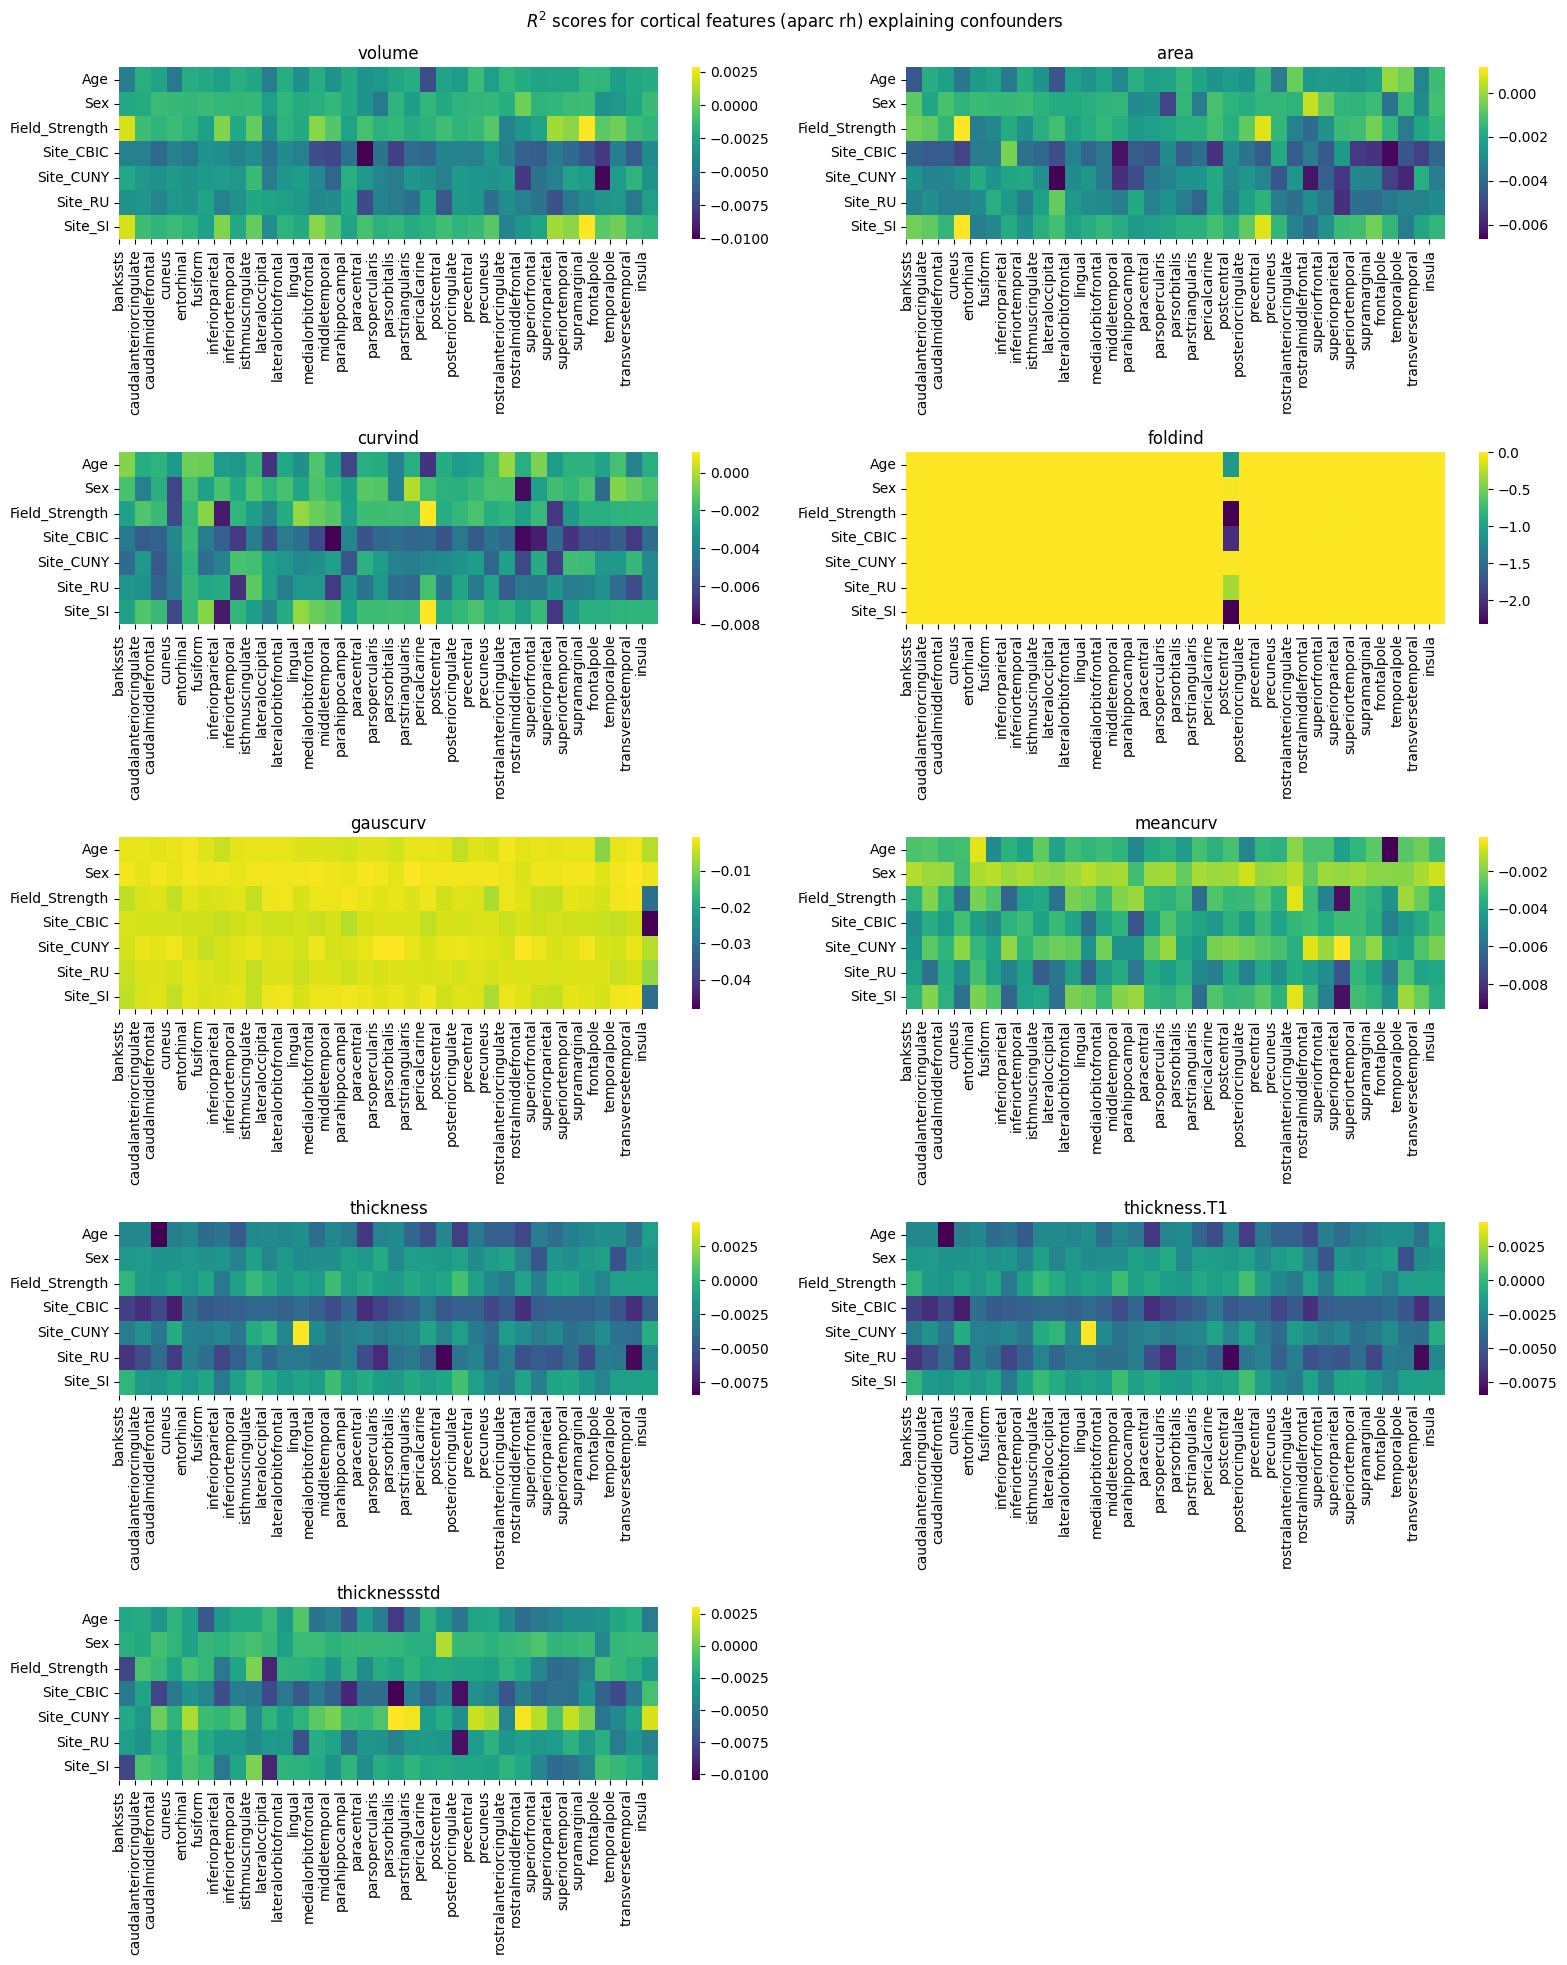

In [17]:
# Plot
plt.figure(1,(16,20))

for index in range(len(aparc_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aparc_roi_labels)
    plt.subplot(5,2,index+1)
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None))
    plt.xticks(range(len(aparc_roi_labels)),aparc_roi_labels)
    plt.title(f"{aparc_msnts[index]}")

plt.suptitle(r"$R^2$ scores for cortical features (aparc rh) explaining confounders" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}r2_features_confounder_aparc_rh.png', bbox_inches='tight')

## 2. Quantify associations between features and diagnoses

In [18]:
# Split dataset into train and test (holdout) set
F_train, F_test, D_train, D_test = train_test_split(F_standardized, D, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(F_train)}")
print(f"Number of samples in test set: {len(F_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 2.1. Global features

In [19]:
score_dicts = compute_univariate_scores_global(F_train, F_test, D_train, D_test, global_msnts, 'auroc', boot_iter)

In [20]:
P = pd.DataFrame.from_dict(score_dicts, orient='index', columns=global_msnts)

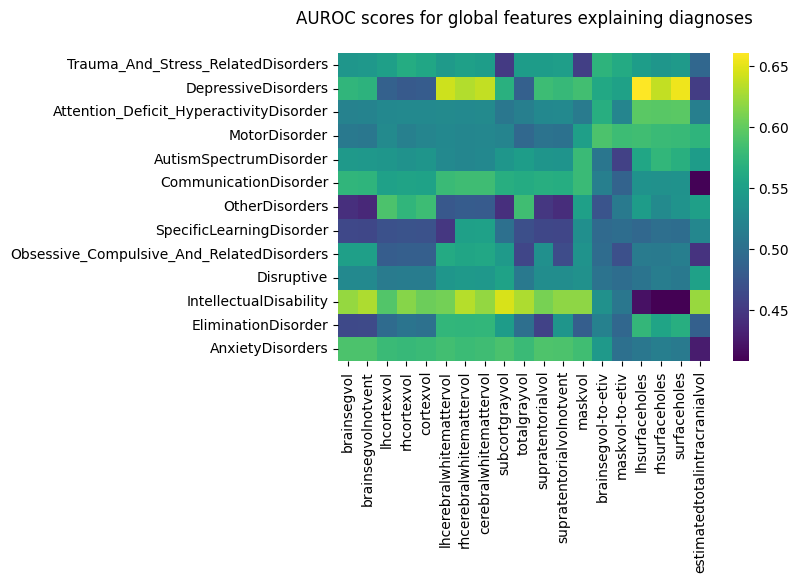

In [21]:
# Plot
plt.figure(1,(6,4))
sns.heatmap(P, cmap='viridis', fmt=".2f", vmin=P.min(axis=None), vmax=P.max(axis=None))
plt.title(r"AUROC scores for global features explaining diagnoses" + "\n")
plt.savefig(plot_path + 'auroc_features_diagnoses_global.png', bbox_inches='tight')

### 2.2. Subcortical features

In [22]:
score_dicts = compute_univariate_scores(F_train, F_test, D_train, D_test, 'aseg', aseg_msnts, 'auroc', boot_iter)

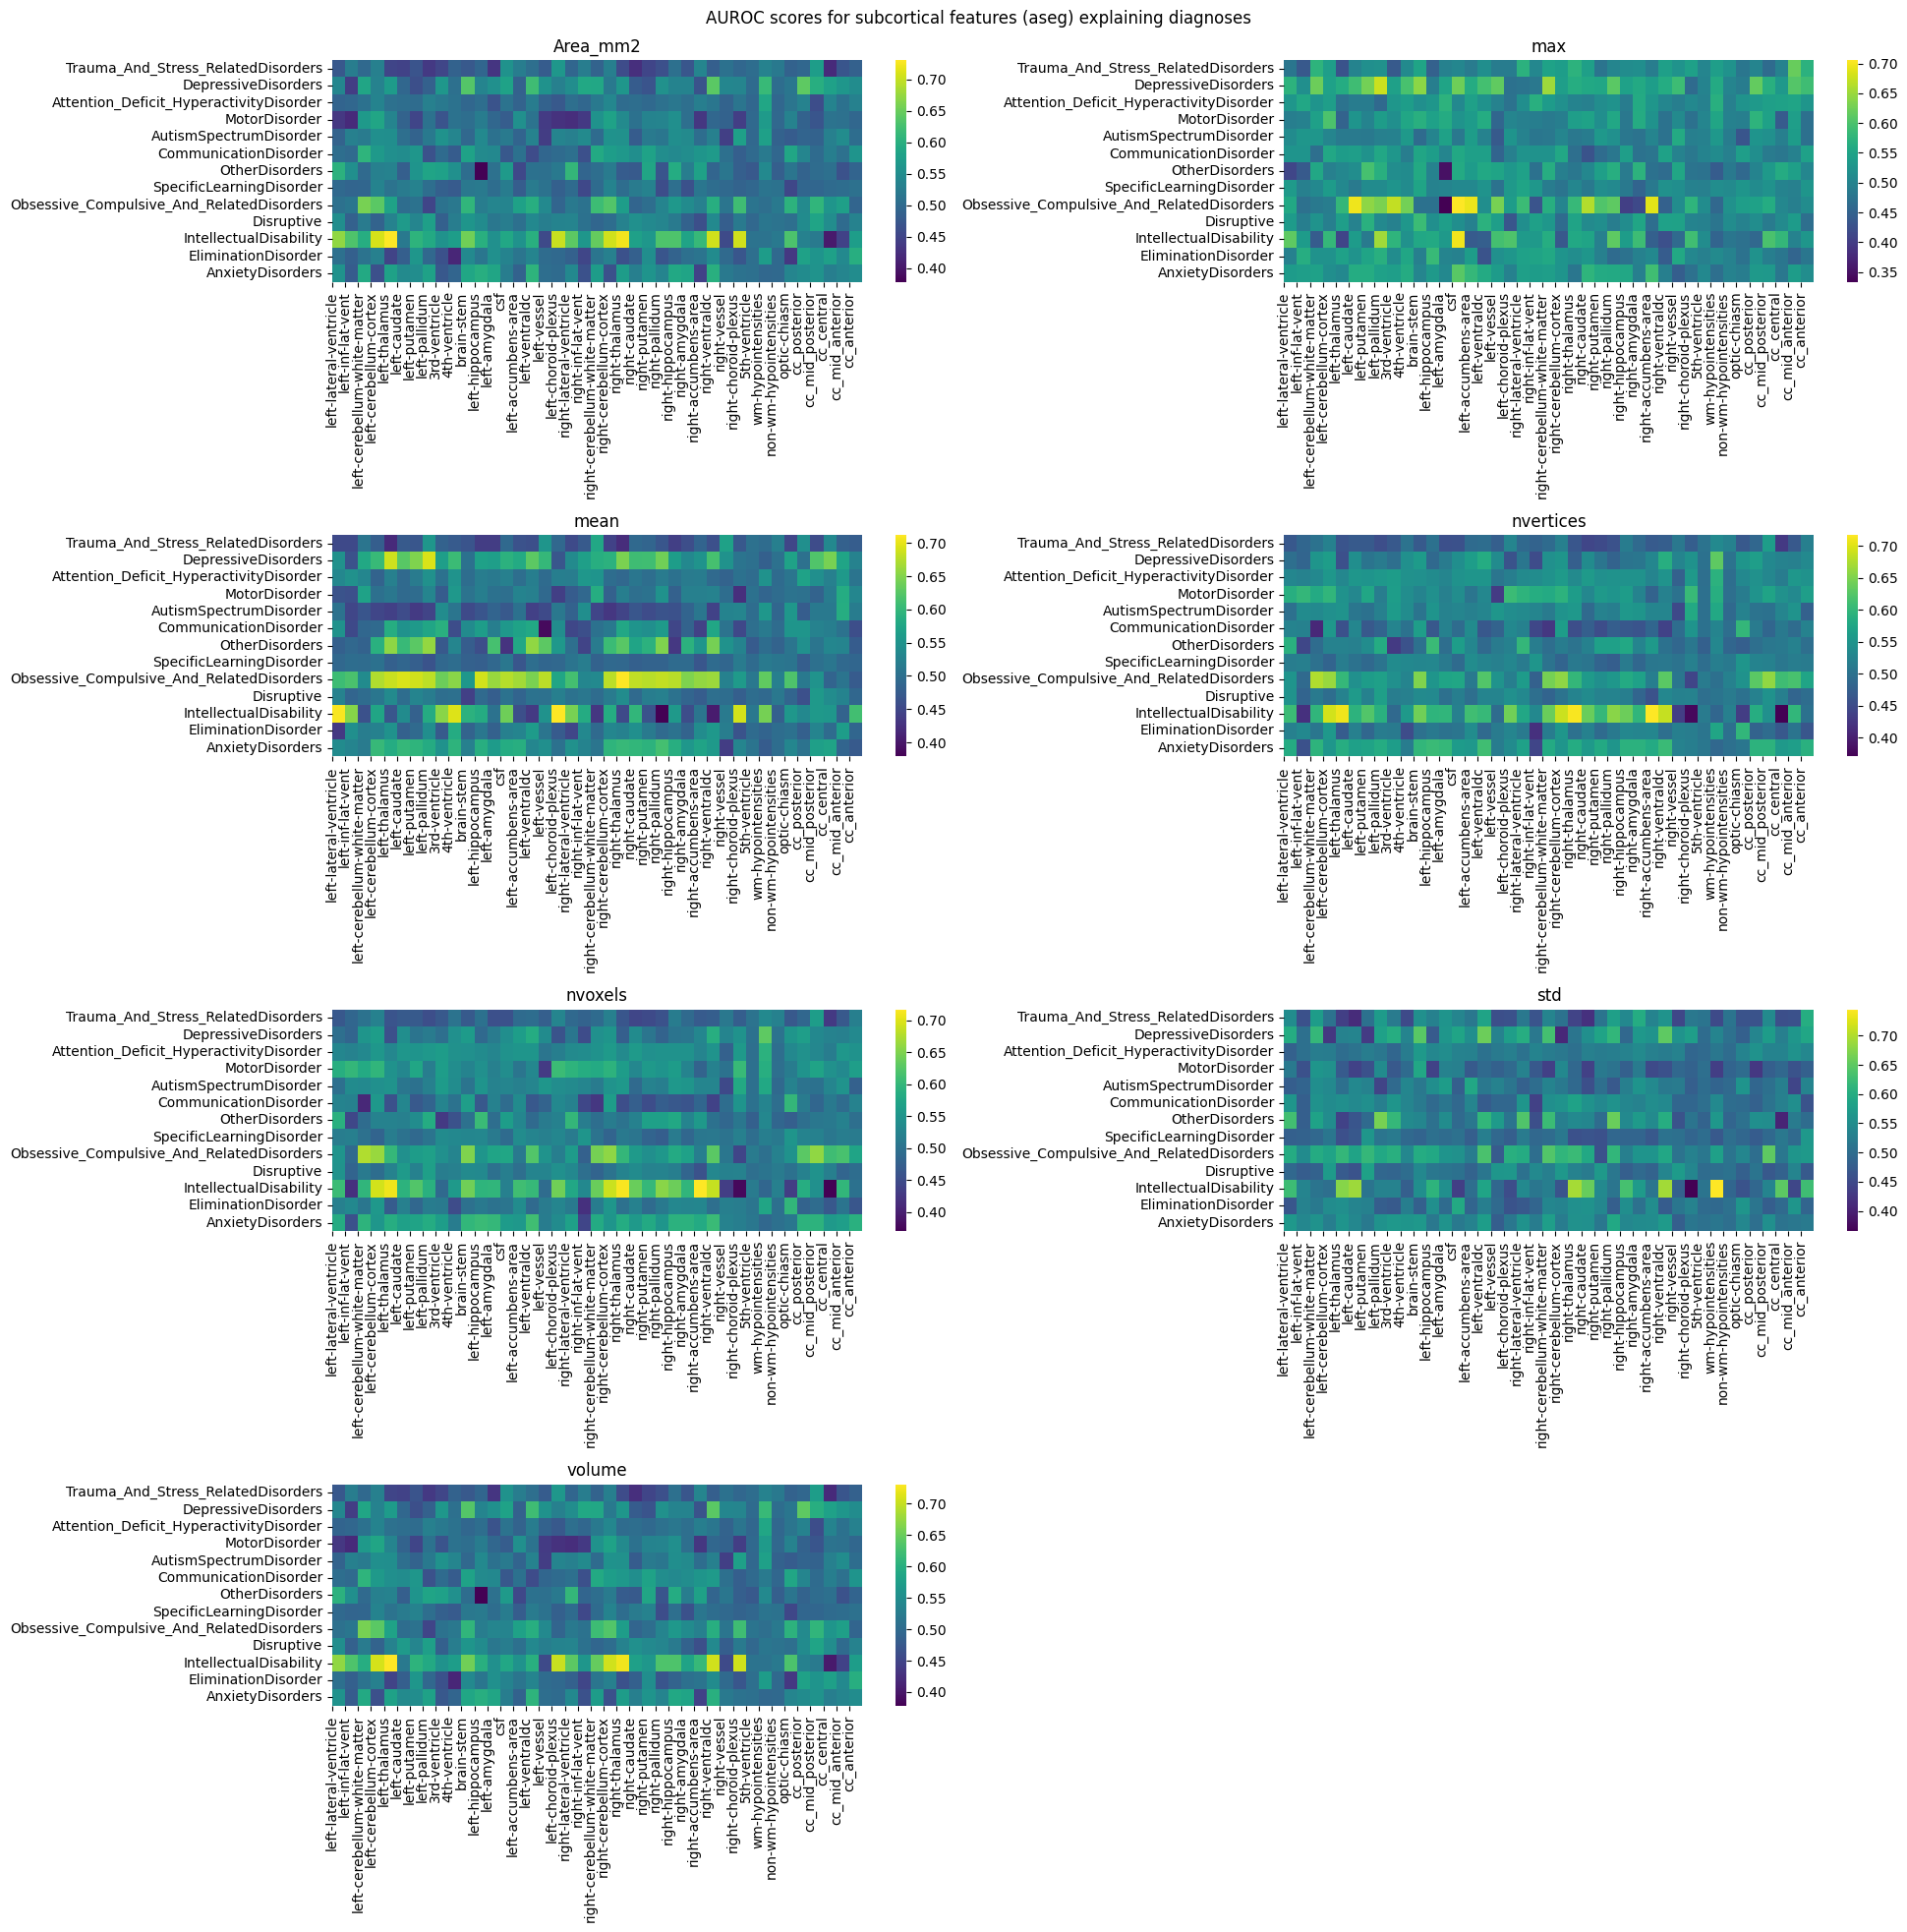

In [23]:
# Plot
plt.figure(1,(20,20))

for index in range(len(aseg_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aseg_roi_labels)
    plt.subplot(4,2,index+1)
    #sns.heatmap(P, cmap='viridis',fmt=".2f")
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None), fmt=".2f")
    plt.xticks(range(len(aseg_roi_labels)),aseg_roi_labels)
    plt.title(f"{aseg_msnts[index]}")

plt.suptitle(r"AUROC scores for subcortical features (aseg) explaining diagnoses" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}auroc_features_diagnoses_aseg.png', bbox_inches='tight')

### 2.3. Cortical features

#### 2.3.1. Left hemisphere

In [ ]:
score_dicts = compute_univariate_scores(F_train, F_test, D_train, D_test, 'aparc_lh', aparc_msnts, 'auroc', boot_iter)

In [ ]:
# Plot
plt.figure(1,(20,20))

for index in range(len(aparc_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aparc_roi_labels)
    plt.subplot(5,2,index+1)
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None))
    plt.xticks(range(len(aparc_roi_labels)),aparc_roi_labels)
    plt.title(f"{aparc_msnts[index]}")

plt.suptitle(r"AUROC scores for cortical features (aparc lh) explaining diagnoses" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}auroc_features_diagnoses_aparc_lh.png', bbox_inches='tight')

#### 2.3.2 Right hemisphere

In [ ]:
score_dicts = compute_univariate_scores(F_train, F_test, D_train, D_test, 'aparc_rh', aparc_msnts, 'auroc', boot_iter)

In [ ]:
# Plot
plt.figure(1,(20,20))

for index in range(len(aparc_msnts)):
    P = pd.DataFrame.from_dict(score_dicts[index], orient='index', columns=aparc_roi_labels)
    plt.subplot(5,2,index+1)
    sns.heatmap(P, cmap='viridis', vmin=P.min(axis=None), vmax=P.max(axis=None))
    plt.xticks(range(len(aparc_roi_labels)),aparc_roi_labels)
    plt.title(f"{aparc_msnts[index]}")

plt.suptitle(r"AUROC scores for cortical (aparc rh) features explaining diagnoses" + "\n")
plt.tight_layout()

plt.savefig(f'{plot_path}auroc_features_diagnoses_aparc_rh.png', bbox_inches='tight')

## 3. Quantify associations between confounders and diagnoses

In [8]:
# Split dataset into train and test (holdout) set
C_train, C_test, D_train, D_test = train_test_split(C_standardized, D, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(C_train)}")
print(f"Number of samples in test set: {len(C_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 3.1. Univariate

In [9]:
score_dicts = compute_univariate_auroc_scores(C_train, C_test, D_train, D_test, boot_iter)

In [16]:
P = pd.DataFrame.from_dict(score_dicts, orient='index', columns=D_train.columns)

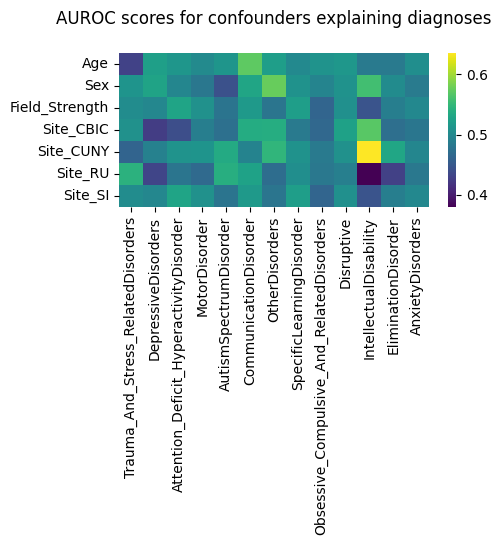

In [17]:
# Plot
plt.figure(1,(5,2))
sns.heatmap(P, cmap='viridis')
plt.title(r"AUROC scores for confounders explaining diagnoses" + "\n")
plt.savefig(plot_path + 'auroc_features_diagnoses_global.png', bbox_inches='tight')